In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

import warnings
from sklearn.exceptions import ConvergenceWarning

# **Чтение файла**

In [10]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks1/titanic3.csv', on_bad_lines='warn', sep=';')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,"14,4542",NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,"26,5",0.0,0.0,2656,"7,2250",NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27,0.0,0.0,2670,"7,2250",NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29,0.0,0.0,315082,"7,8750",NaN,S,NaN,NaN,NaN


# **Удаление ненужных данных**

In [11]:
df = df.iloc[:-1]
del df['body']
df
# Признаки:
# 	-	pclass: класс билета, список значений {1, 2, 3}
# 	-	survived: 1 если пассажир выжил, 0 если погиб
# 	-	name: имя пассажира, строковое значение
# 	-	sex: пол пассажира, строковое значение
# 	-	age: возраст пассажира
# 	-	sibsp: кол-во братьев/сестер пассажира вместе с его мужем/женой
# 	-	parch: кол-во родителей пассажира вместе с его детьми
# 	-	ticket: номер билета
# 	-	fare: цена билета
# 	-	cabin: номер каюты
# 	-	embarking: порт посадки на корабль, строковое значение
# 	-	home.dest: пункт назначения, строковое значение

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,"14,5",1.0,0.0,2665,"14,4542",NaN,C,NaN,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,"14,4542",NaN,C,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,"26,5",0.0,0.0,2656,"7,2250",NaN,C,NaN,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27,0.0,0.0,2670,"7,2250",NaN,C,NaN,NaN


# **Приведение числовых значений к соответствующему типу**

In [12]:
num_cols = ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'ticket', 'boat']
for col in num_cols:
  for i in range(len(df[col])):
    if type(df[col][i]) == str and ',' in df[col][i]:
      df.loc[i, col] = df.loc[i, col].replace(',', '.', 1)
for col in num_cols:
  df[col] = pd.to_numeric(df[col], errors = 'coerce')
df

<ipython-input-12-64e964527758>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors = 'coerce')


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160.0,211.3375,B5,S,2.0,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.5500,C22 C26,S,11.0,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781.0,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781.0,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781.0,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665.0,14.4542,NaN,C,NaN,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665.0,14.4542,NaN,C,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656.0,7.2250,NaN,C,NaN,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670.0,7.2250,NaN,C,NaN,NaN


# **3. Удаление дубликатов**

In [14]:
print(f'Текущий размер датафрейма: {len(df)}')
c = len(df.drop_duplicates()) - len(df)
df = df.drop_duplicates()
print(f'Дубликаты удалены. Количество найденных дубликатов: {-c}. Текущий размер датафрейма: {len(df)}')

Текущий размер датафрейма: 1309
Дубликаты удалены. Количество найденных дубликатов: 0. Текущий размер датафрейма: 1309


# **4. Оценка сбалансированности классов**

809.0 500.0


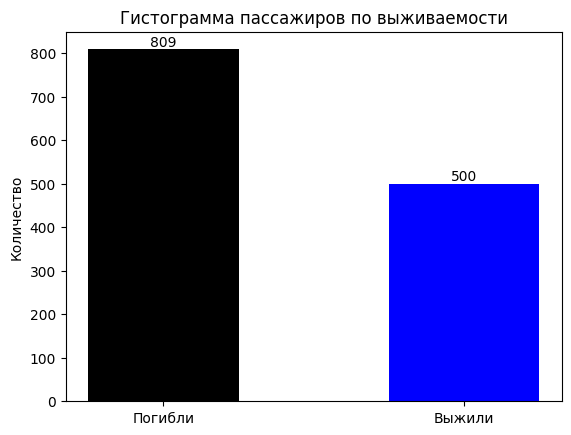

In [15]:
# Подсчет количества выживших и погибших
alive = df['survived'].sum()
dead = len(df['survived']) - alive
print(dead, alive)
# Создание гистограммы
bars = plt.bar(
    ['Погибли', 'Выжили'],  # Подписи столбцов
    [dead, alive],  # Высота столбцов
    color=['black', 'blue'],  # Цвета для 0 и 1
    width=0.5  # Ширина столбцов
)

# Добавление подписей количества над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-координата надписи (центр столбца)
        height + 0.1,  # Y-координата (немного выше столбца)
        str(int(height)),  # Текст (количество)
        ha='center',  # Горизонтальное выравнивание по центру
        va='bottom'  # Вертикальное выравнивание снизу
    )

# Настройка графика
plt.title('Гистограмма пассажиров по выживаемости')
plt.ylabel('Количество')

plt.show()

# **6. Удаление выбросов**

# **6.1 Поиск выбросов**

In [8]:
# count = 0
# for i in df['pclass']:
#   if i not in (1, 2, 3):
#     count += 1
#     print(i)
# print(count)

# count = 0
# for i in df['survived']:
#   if i not in (0, 1):
#     count += 1
#     print(i)
# print(count)

# count = 0
# for i in df['sex']:
#   if i not in ('female', 'male'):
#     count += 1
#     print(i)
# print(count)

# count = 0
# for i in df['age']:
#   if i < 0 or i > 100:
#     count += 1
#     print(i)
# print(count)

# count = 0
# for j in ('sibsp', 'parch', 'fare', 'boat'):
#   count = 0
#   for i in df[j]:
#     if i < 0:
#       count += 1
#       print(i)
#   print(count)
# print('Выбросовых значений нет')

print('Удаление выбросовых значений')
print(f'Длина до удаления: {len(df)}')
for i in ('age', 'fare'):
  q1, q3 = df[i].quantile([0.25, 0.75])
  iqr = q3 - q1
  bottom_limit, upper_limit = q1 - 1.5*iqr, q3 + 1.5*iqr
  df = df[(df[i] >= bottom_limit) & (df[i] <= upper_limit)]
print(f'Длина после удаления: {len(df)}')
df

Удаление выбросовых значений
Длина до удаления: 1309
Длина после удаления: 833


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0,0.0,0.0,19952.0,26.5500,E12,S,3.0,"New York, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0,0.0,0.0,112050.0,0.0000,A36,S,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2.0,0.0,11769.0,51.4792,C101,S,NaN,"Bayside, Queens, NY"
20,1.0,1.0,"Beckwith, Mr. Richard Leonard",male,37.0,1.0,1.0,11751.0,52.5542,D35,S,5.0,"New York, NY"
21,1.0,1.0,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1.0,1.0,11751.0,52.5542,D35,S,5.0,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3.0,0.0,"Youseff, Mr. Gerious",male,45.5,0.0,0.0,2628.0,7.2250,NaN,C,NaN,NaN
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665.0,14.4542,NaN,C,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656.0,7.2250,NaN,C,NaN,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670.0,7.2250,NaN,C,NaN,NaN


# **7. Заполнение пропущенных значений**

# **7.1 Поиск пропущенных значений**

In [16]:
df1 = df.isnull().sum()
df1

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,352
fare,1
cabin,1014


# **7.2 Вставка пропущенных значений**

In [17]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
for i in ('age', 'ticket', 'fare'):
  imputed_data = imp_mean.fit_transform(pd.DataFrame(df[i]))
  df[i] = imputed_data

df.fillna({'cabin': 'unknown', 'boat': 0, 'home.dest': 'unknown'}, inplace=True)
df


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160.0,211.3375,B5,S,2.0,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781.0,151.5500,C22 C26,S,11.0,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781.0,151.5500,C22 C26,S,0.0,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781.0,151.5500,C22 C26,S,0.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781.0,151.5500,C22 C26,S,0.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.500000,1.0,0.0,2665.0,14.4542,unknown,C,0.0,unknown
1305,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665.0,14.4542,unknown,C,0.0,unknown
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656.0,7.2250,unknown,C,0.0,unknown
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670.0,7.2250,unknown,C,0.0,unknown


# **8. Масштабирование данных**

# **8.1 Распределение значений признаков до масштабирования**



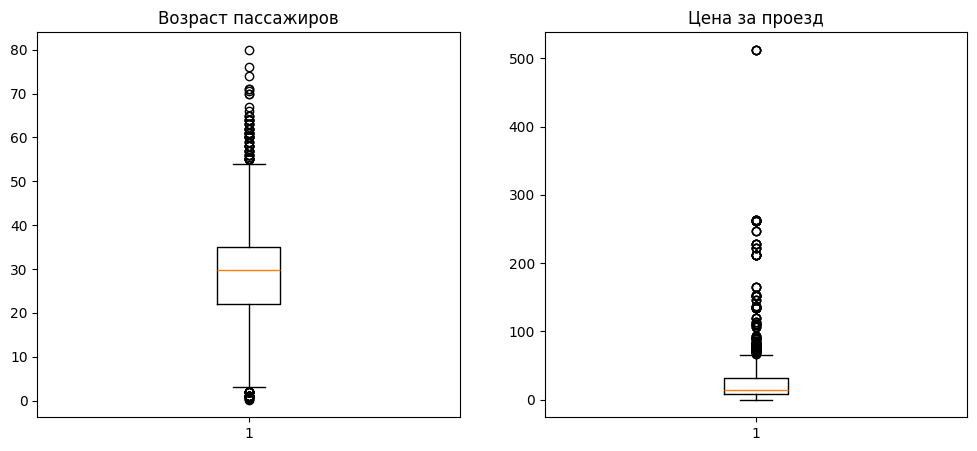

In [18]:
plt.figure(figsize=(12, 5))  # Увеличим размер графика для лучшей читаемости
plt.subplot(1, 2, 1)
plt.boxplot(df['age'])
plt.title('Возраст пассажиров')
plt.subplot(1, 2, 2)
plt.boxplot(df['fare'])
plt.title('Цена за проезд')
plt.show()

# **8.2 Масштабирование**

In [19]:
for col in ('pclass', 'age', 'fare', 'ticket', 'boat'):
  norm_col = np.array(df[col])
  norm_col = [i for i in preprocessing.normalize([norm_col])[0]]
  norm_col = pd.Series(norm_col)
  df[col] = norm_col
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,0.011314,1.0,"Allen, Miss. Elisabeth Walton",female,0.024634,0.0,0.0,0.001474,0.094965,B5,S,0.009674,"St Louis, MO"
1,0.011314,1.0,"Allison, Master. Hudson Trevor",male,0.000779,1.0,2.0,0.006943,0.068099,C22 C26,S,0.053208,"Montreal, PQ / Chesterville, ON"
2,0.011314,0.0,"Allison, Miss. Helen Loraine",female,0.001699,1.0,2.0,0.006943,0.068099,C22 C26,S,0.000000,"Montreal, PQ / Chesterville, ON"
3,0.011314,0.0,"Allison, Mr. Hudson Joshua Creighton",male,0.025483,1.0,2.0,0.006943,0.068099,C22 C26,S,0.000000,"Montreal, PQ / Chesterville, ON"
4,0.011314,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,0.021236,1.0,2.0,0.006943,0.068099,C22 C26,S,0.000000,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.033942,0.0,"Zabour, Miss. Hileni",female,0.012317,1.0,0.0,0.000163,0.006495,unknown,C,0.000000,unknown
1305,0.033942,0.0,"Zabour, Miss. Thamine",female,0.025382,1.0,0.0,0.000163,0.006495,unknown,C,0.000000,unknown
1306,0.033942,0.0,"Zakarian, Mr. Mapriededer",male,0.022510,0.0,0.0,0.000162,0.003247,unknown,C,0.000000,unknown
1307,0.033942,0.0,"Zakarian, Mr. Ortin",male,0.022935,0.0,0.0,0.000163,0.003247,unknown,C,0.000000,unknown


# **8.3 Распределение значений признаков после масштабирования**

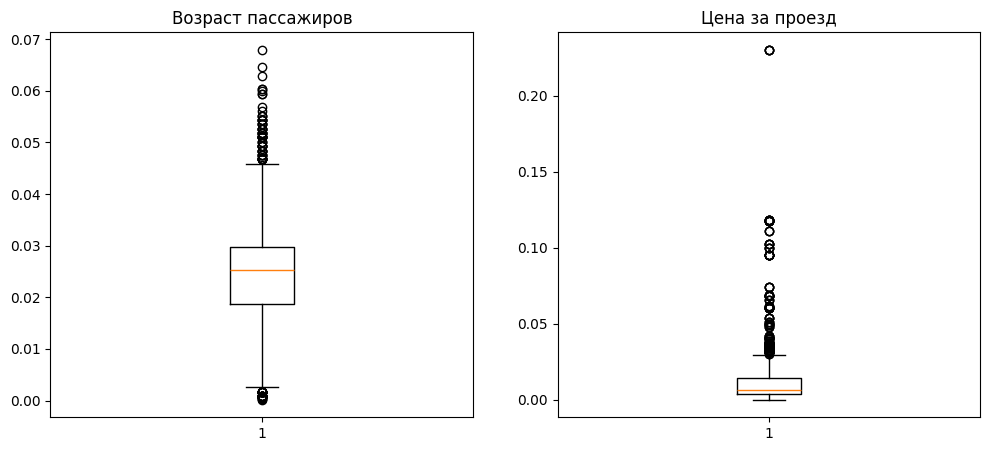

In [20]:
plt.figure(figsize=(12, 5))  # Увеличим размер графика для лучшей читаемости
plt.subplot(1, 2, 1)
plt.boxplot(df['age'])
plt.title('Возраст пассажиров')
plt.subplot(1, 2, 2)
plt.boxplot(df['fare'])
plt.title('Цена за проезд')
plt.show()

# **9. Замена категориальных признаков (LabelEncoder)**

In [ ]:
df

In [21]:
# Заменим категориальные признаки с помощью LabelEncoder, т. к. для некоторых признаков OneHotEncoder будет слишком громоздким.
# Все признаки, которые будут принимать участие в обучении были нормализованы, т. е. нет смысла применять OneHotEncoder.
encoder = LabelEncoder()
for col in ('sex', 'cabin', 'embarked', 'home.dest'):
  df[col] = encoder.fit_transform(df[col])
for i in range(len(df)):
  df.loc[i, 'sex'] = 0 if df.loc[i, 'sex'] == 1 else 1
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,0.011314,1.0,"Allen, Miss. Elisabeth Walton",1,0.024634,0.0,0.0,0.001474,0.094965,43,2,0.009674,308
1,0.011314,1.0,"Allison, Master. Hudson Trevor",0,0.000779,1.0,2.0,0.006943,0.068099,79,2,0.053208,230
2,0.011314,0.0,"Allison, Miss. Helen Loraine",1,0.001699,1.0,2.0,0.006943,0.068099,79,2,0.000000,230
3,0.011314,0.0,"Allison, Mr. Hudson Joshua Creighton",0,0.025483,1.0,2.0,0.006943,0.068099,79,2,0.000000,230
4,0.011314,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0.021236,1.0,2.0,0.006943,0.068099,79,2,0.000000,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.033942,0.0,"Zabour, Miss. Hileni",1,0.012317,1.0,0.0,0.000163,0.006495,186,0,0.000000,369
1305,0.033942,0.0,"Zabour, Miss. Thamine",1,0.025382,1.0,0.0,0.000163,0.006495,186,0,0.000000,369
1306,0.033942,0.0,"Zakarian, Mr. Mapriededer",0,0.022510,0.0,0.0,0.000162,0.003247,186,0,0.000000,369
1307,0.033942,0.0,"Zakarian, Mr. Ortin",0,0.022935,0.0,0.0,0.000163,0.003247,186,0,0.000000,369


# **10. Матрица корреляции**

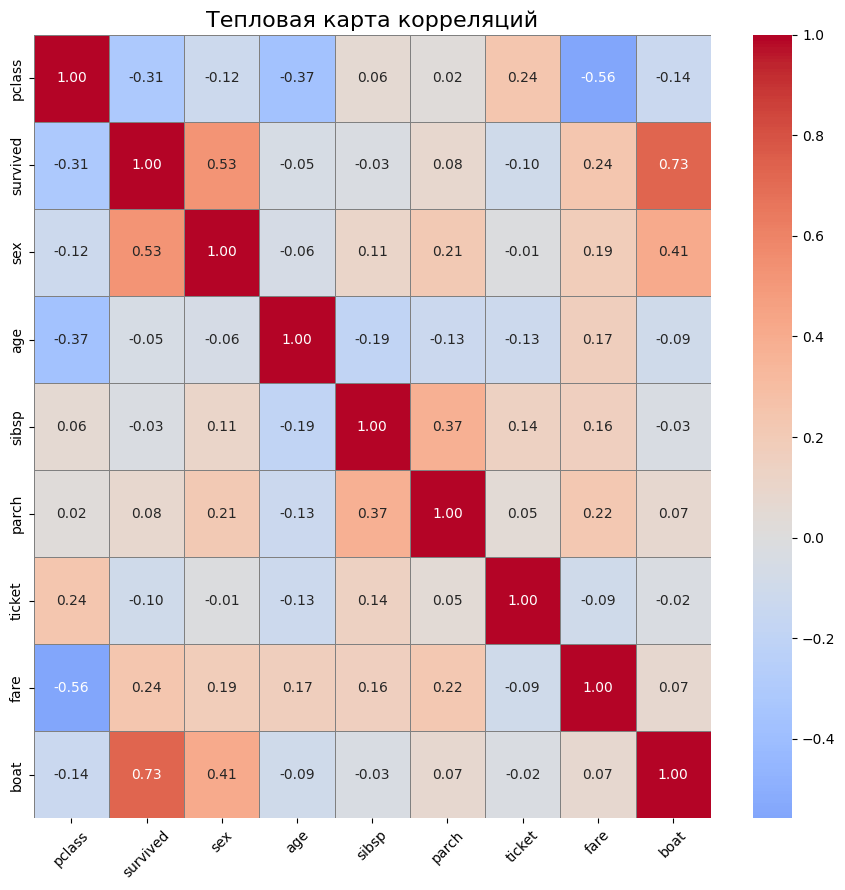

In [22]:
# Вычисляем матрицу корреляций
corr_columns = ['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'ticket',
                'fare', 'boat']
corr_matrix = df[corr_columns].corr()

# Строим тепловую карту
plt.figure(figsize=(9, 9))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    linecolor='gray'
)

# Настройка заголовка
plt.title("Тепловая карта корреляций", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **11. Решение задачи классификации**

# **11.1 Метод k ближайших соседей**


# **11.1.1 Подбор гиперпараметров и обучение модели**

In [23]:
# Подготовим данные
train_columns = [i for i in corr_columns if i != 'survived']
X = df[train_columns]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Подберем гиперпараметры
model = KNeighborsClassifier()
param_grid = {'weights': ["uniform", "distance"],
              'n_neighbors': range(1, 31)}  # Проверяем значения n_neighbors от 1 до 30 и значения weights
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=['accuracy', 'f1'], refit='accuracy') # Осуществляем кросс-валидацию
# Т. к. целевые классы не имеют большого дисбаланса, метрики 'accuracy' и 'f1' покажут схожие результаты.
# Для refit выберем значение 'accuracy', т. к. он более простой.
grid_search.fit(X_train, y_train)

print("Лучшее n_neighbors:", grid_search.best_params_['n_neighbors'])
print("Лучшее weights:", grid_search.best_params_['weights'])

Лучшее n_neighbors: 5
Лучшее weights: distance


In [24]:
# Предсказание классов на тестовой выборке
y_pred = grid_search.predict(X_test)

# Метрики
print('Метрики с гиперпараметрами, подобранными кросс-валидацией')
print(classification_report(y_test, y_pred))
print(f'    accuracy       {accuracy_score(y_test, y_pred):.2f}')
print()

Метрики с гиперпараметрами, подобранными кросс-валидацией
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       224
         1.0       0.92      0.78      0.84       169

    accuracy                           0.88       393
   macro avg       0.88      0.86      0.87       393
weighted avg       0.88      0.88      0.87       393

    accuracy       0.88



# **11.1.2 ROC-кривая (используем ее, т. к. имеем умереный дисбаланс)**

Площадь под кривой: 0.86


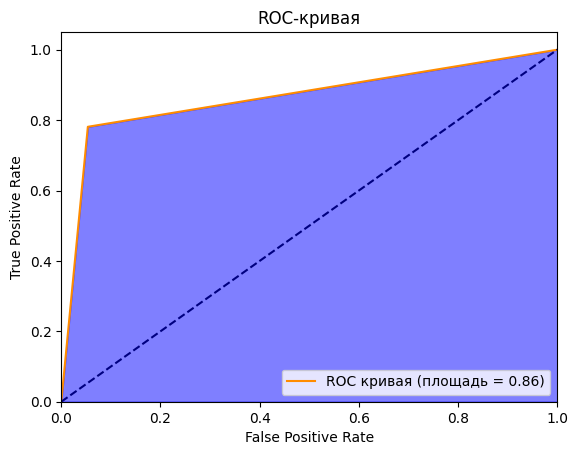

In [25]:
lr_auc = roc_auc_score(y_test, y_pred)
print(f'Площадь под кривой: {lr_auc:.2f}')
fpr, tpr, treshold = roc_curve(y_test, y_pred) # Вычисляем количество ложно-положительных (fpr) и
                                               # истино-положительных (tpr) значений
plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC кривая (площадь = {lr_auc:.2f})')
plt.fill_between(fpr, tpr, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

# **11.1.3 Сравнение результатов**

In [26]:
print('Метрики с гиперпараметрами, подобранными кросс-валидацией')
print(classification_report(y_test, y_pred))
print(f'   auc score:      {lr_auc:.2f}')
print(f'    accuracy       {accuracy_score(y_test, y_pred):.2f}')

Метрики с гиперпараметрами, подобранными кросс-валидацией
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       224
         1.0       0.92      0.78      0.84       169

    accuracy                           0.88       393
   macro avg       0.88      0.86      0.87       393
weighted avg       0.88      0.88      0.87       393

   auc score:      0.86
    accuracy       0.88


# **11.2 Многослойный перцептрон**

# **11.2.1 Удаление высоко кореллирующих столбцов**

In [27]:
# Параметры fare и pclass имеют высокую корреляци -0.56.
# Значение отрицательное, т. к. при большем значении pclass (т. е. при более низком по иерархии классе пассажира) цена билета ниже
# Удалим столбец fare
df1 = df
del df1['fare']

# **11.2.2 Подбор гиперпараметров и обучение модели (без регуляризации)**

In [28]:
# Подготовим данные
train_columns = [i for i in corr_columns if i not in ('survived', 'fare')]
X = df1[train_columns]
y = df1['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

parameters = {
    'hidden_layer_sizes': [(100,), (500,), (1000, ), (100, 50)],
    'max_iter': [100, 500, 1000, 5000]
}

# Уберем предупреждения ConvergenceWarning, флудящие консоль и замедляющие выполнение кроссвалидации
warnings.filterwarnings("ignore", category=ConvergenceWarning)

mlp = MLPClassifier()
clf = GridSearchCV(mlp, parameters, cv=5, scoring=['accuracy', 'f1'], refit='accuracy') # Осуществляем кросс-валидацию
# Т. к. целевые классы не имеют большого дисбаланса, метрики 'accuracy' и 'f1' покажут схожие результаты.
# Для refit выберем значение 'accuracy', т. к. он более простой.
clf.fit(X_train, y_train)
clf_score = clf.score(X_train, y_train)
print(f'Наилучшее количество слоев и нейронов: {clf.best_params_["hidden_layer_sizes"]}')
print(f'Наилучший предел итераций: {clf.best_params_["max_iter"]}')

print(f'Средняя точность на обучающих данных: {clf_score:.2f}')
clf_score = clf.score(X_test, y_test)
print(f'Средняя точность на тестовых данных: {clf_score:.2f}')

Наилучшее количество слоев и нейронов: (100,)
Наилучший предел итераций: 1000
Средняя точность на обучающих данных: 0.92
Средняя точность на тестовых данных: 0.90


In [29]:
# Предсказание классов на тестовой выборке
y_pred_clf = clf.predict(X_test)

# Метрики
print('Метрики с гиперпараметрами, подобранными кросс-валидацией')
print(classification_report(y_test, y_pred_clf))
print(f'    accuracy       {accuracy_score(y_test, y_pred_clf):.2f}')
print()

Метрики с гиперпараметрами, подобранными кросс-валидацией
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       565
         1.0       0.95      0.78      0.86       352

    accuracy                           0.90       917
   macro avg       0.91      0.88      0.89       917
weighted avg       0.90      0.90      0.90       917

    accuracy       0.90



# **11.2.3 ROC-кривая для модели без регуляризации**

Площадь под кривой: 0.88


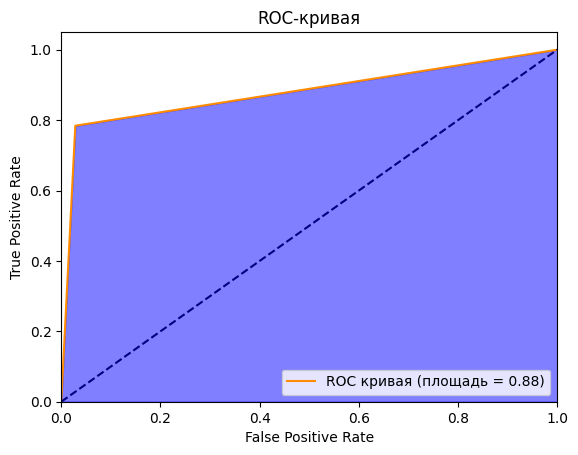

In [30]:
lr_auc = roc_auc_score(y_test, y_pred_clf)
print(f'Площадь под кривой: {lr_auc:.2f}')
fpr, tpr, treshold = roc_curve(y_test, y_pred_clf) # Вычисляем количество ложно-положительных (fpr) и
                                                   # истино-положительных (tpr) значений
plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC кривая (площадь = {lr_auc:.2f})')
plt.fill_between(fpr, tpr, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

# **11.2.4 Подбор гиперпараметров и обучение модели (с L2 регуляризацией)**

In [31]:
# Подготовим данные
train_columns = [i for i in corr_columns if i not in ('survived', 'fare')]
X = df[train_columns]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

parameters = {
    'hidden_layer_sizes': [(100,), (500,), (1000, ), (100, 50)],
    'max_iter': [100, 500, 1000, 5000],
    'alpha': [0.05]
}
mlp = MLPClassifier()
clf = GridSearchCV(mlp, parameters, cv=5, scoring=['accuracy', 'f1'], refit='accuracy') # Осуществляем кросс-валидацию
# Т. к. целевые классы не имеют большого дисбаланса, метрики 'accuracy' и 'f1' покажут схожие результаты.
# Для refit выберем значение 'accuracy', т. к. он более простой.
clf.fit(X_train, y_train)
clf_score = clf.score(X_train, y_train)
print(f'Наилучшее количество слоев и нейронов: {clf.best_params_["hidden_layer_sizes"]}')
print(f'Наилучший предел итераций: {clf.best_params_["max_iter"]}')
print(f'Наилучшая сила регуляризации: {clf.best_params_["alpha"]}')
print(f'Средняя точность на обучающих данных: {clf_score:.2f}')
clf_score = clf.score(X_test, y_test)
print(f'Средняя точность на тестовых данных: {clf_score:.2f}')

Наилучшее количество слоев и нейронов: (100, 50)
Наилучший предел итераций: 5000
Наилучшая сила регуляризации: 0.05
Средняя точность на обучающих данных: 0.93
Средняя точность на тестовых данных: 0.90


In [32]:
# Предсказание классов на тестовой выборке
y_pred_clf = clf.predict(X_test)

# Метрики
print('Метрики с гиперпараметрами, подобранными кросс-валидацией')
print(classification_report(y_test, y_pred_clf))
print(f'    accuracy       {accuracy_score(y_test, y_pred_clf):.2f}')
print()

Метрики с гиперпараметрами, подобранными кросс-валидацией
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       391
         1.0       0.93      0.80      0.86       264

    accuracy                           0.90       655
   macro avg       0.91      0.88      0.89       655
weighted avg       0.90      0.90      0.89       655

    accuracy       0.90



# **11.2.5 ROC-кривая для модели с регуляризацией**

Площадь под кривой: 0.88


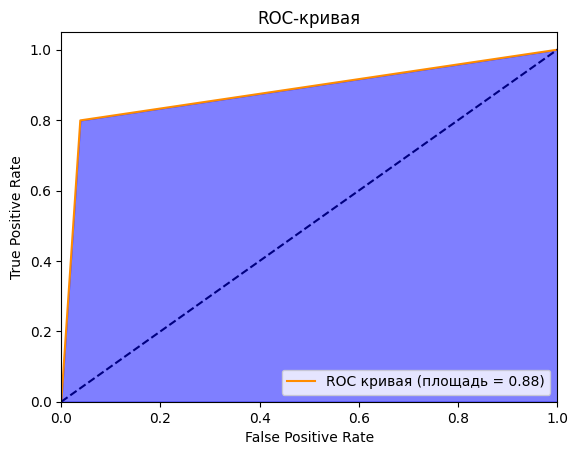

In [33]:
lr_auc = roc_auc_score(y_test, y_pred_clf)
print(f'Площадь под кривой: {lr_auc:.2f}')
fpr, tpr, treshold = roc_curve(y_test, y_pred_clf) # Вычисляем количество ложно-положительных (fpr) и
                                                   # истино-положительных (tpr) значений
plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC кривая (площадь = {lr_auc:.2f})')
plt.fill_between(fpr, tpr, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()